In [1]:
# Monday 21 Sep 2020
#

import warnings
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

obs = [1,29,3,7]
exp = [3,27,1,9]

# df = degrees of freedom
# df = 4 - 1 - ddof 
c  = 2      # 2 constraint = df = 1
#c  = 1      # 1 constraint = df = 2
#c  = 0      # 0 constraint = df = 3
df = 4-1-c

# the chi2 val
# calculated directly
#
chi2val = 0
for i in range(len(obs)):
    chi2val += (obs[i]-exp[i])*(obs[i]-exp[i])/exp[i]
print("The chi-square value calculated using the definition")
print("chi square ", chi2val, " at df = ", df)


The chi-square value calculated using the definition
chi square  5.925925925925926  at df =  1


In [ ]:
# The p-value calculated using the chi2 distribution and the definition of p-value
#
pval = 1-stats.chi2.cdf(chi2val, df, loc=0, scale=1)
print("\nThe p-value calculated using the chi2 distribution and the definition of p-value")
print("chi square ", chi2val, "p-value ", pval, " at df = ", df)


In [2]:
# the chi2 val
# calculated using the chisquare function in numpy
#
c = 2
chi2vala, pvala = stats.chisquare(obs, exp, ddof=c)
#chi2_val_a, p-val_a = stats.chisquare(obs)
print("\nThe p-value calculated using the numpy function chisquare")
print("chi square ", chi2vala, "p-value ", pvala, " at df = ", df)



The p-value calculated using the numpy function chisquare
chi square  5.925925925925926 p-value  0.014919696305821892  at df =  1


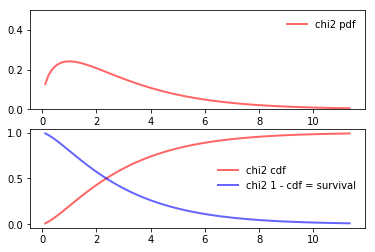

In [3]:
df = 3
# The chisquare distribution
#
fig, ax = plt.subplots(2, 1)
x = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df), 100)

# the PDF
ax[0].plot(x, stats.chi2.pdf(x, df), 'r-', lw=2, alpha=0.6, label='chi2 pdf')
ax[0].legend(loc='best', frameon=False)
ax[0].set_ylim([0,0.5])

# CDF and 1-CDF
ax[1].plot(x, stats.chi2.cdf(x, df), 'r-', lw=2, alpha=0.6, label='chi2 cdf')
ax[1].plot(x, stats.chi2.sf(x, df),  'b-', lw=2, alpha=0.6, label='chi2 1 - cdf = survival')
ax[1].legend(loc='best', frameon=False)
plt.show()




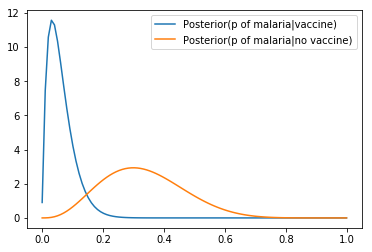

In [4]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import math

def binomial_posterior(f, N, n):
    ff = 1.0 - f # probability of not contracting malaria
    
    # (N+1)!/n! (N-n)!
    coeff  = math.factorial(N+1)
    coeff /= math.factorial(N-n)
    coeff /= math.factorial(n)
    
    # log[(N+1)!] - log[n!] - log[N-n)!]
    logcoeff  = np.log(float(math.factorial(N+1)))
    logcoeff -= np.log(float(math.factorial(N-n)))
    logcoeff -= np.log(float(math.factorial(n)))
                      
    
    # pdf = coeff * f^n * (1-f)^{N-n}
    pdf = coeff * np.exp(    n*np.log(f) + (N-n)*np.log(ff))
    #pdf  = np.exp(logcoeff + n*np.log(f) + (N-n)*np.log(ff))
    return pdf

Nv = 30 # volunteers that have received the vaccine
Nc = 10 # volunteers in control group (no vaccine)
nv = 1  # received vaccine and contracted malaria
nc = 3  # no vaccine and contracted malaria

f = t = np.linspace(0.001, 0.999, 100) # the probability of contracting malaria
pdf_v = binomial_posterior(f, Nv, nv)
pdf_c = binomial_posterior(f, Nc, nc)

plt.plot(f, pdf_v, label = "Posterior(p of malaria|vaccine)")
plt.plot(f, pdf_c, label = "Posterior(p of malaria|no vaccine)")
plt.legend(loc="upper right")
plt.show()

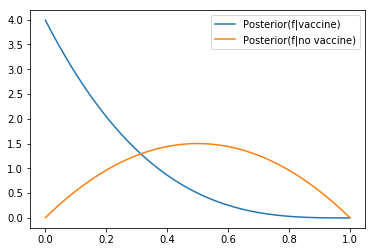

In [5]:
Nv = 3 # volunteers that have received the vaccine
Nc = 2 # volunteers in control group (no vaccine)
nv = 0  # received vaccine and contracted malaria
nc = 1  # no vaccine and contracted malaria
pdf_v = binomial_posterior(f, Nv, nv)
pdf_c = binomial_posterior(f, Nc, nc)

plt.plot(f, pdf_v, label = "Posterior(f|vaccine)")
plt.plot(f, pdf_c, label = "Posterior(f|no vaccine)")
plt.legend(loc="upper right")
plt.show()

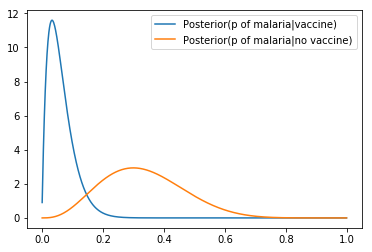

P(fv < fc) =  0.6733318779161933


In [6]:
# P(H1|D)
# The probability that fv < fc
#
Nv = 30 # volunteers that have received the vaccine
Nc = 10 # volunteers in control group (no vaccine)
nv = 1  # received vaccine and contracted malaria
nc = 3  # no vaccine and contracted malaria

nbin = 1000
fmin = 0.001
fmax = 0.999
f = np.linspace(fmin, fmax, nbin) # the probability of contracting malaria

bsize = (fmax-fmin)/nbin

pdf_vc = binomial_posterior(f, Nv+Nc, nv+nc)
pdf_v  = binomial_posterior(f, Nv,    nv)
pdf_c  = binomial_posterior(f, Nc,    nc)
plt.plot(f, pdf_v, label = "Posterior(p of malaria|vaccine)")
plt.plot(f, pdf_c, label = "Posterior(p of malaria|no vaccine)")
plt.legend(loc="upper right")
plt.show()

# P(fv < fc| data)
#
sum1 = 0
for bc in range(nbin):
    fc = fmin + bc*bsize
    
    for bv in range(nbin):
        fv = fmin + bv*bsize
        
        if fv < fc-0.2:
            sum1 += pdf_v[bv]*pdf_c[bc]
sum1 *= bsize*bsize            
print("P(fv < fc) = ", sum1)
    

In [7]:
# P(fv = fc | data)
#
sum2 = 0
for b in range(nbin):
    sum2 += pdf_v[b]*pdf_c[b]
sum2 *= bsize
print("P(fv = fc) = ", sum2)

print("H1/H0 = ", sum1/sum2)


P(fv = fc) =  0.32729534906706564
H1/H0 =  2.0572607580140767


In [8]:
# Wednesday 23 Sep 2020
#
#
# H1: fv < fc - diff
#
def evidenceH1(diff, Nv, nv, Nc, nc, fmin, fmax, bsize):
    
    # overall number of bin for a fixed bsize
    nbin = int((fmax-fmin)/bsize)
    
    # log[(N+1)!] - log[n!] - log[N-n)!]
    logcoeff  = np.log(float(math.factorial(Nc+1)))
    logcoeff -= np.log(float(math.factorial(Nc-nc)))
    logcoeff -= np.log(float(math.factorial(nc)))
    logcoeff += np.log(float(math.factorial(Nv+1)))
    logcoeff -= np.log(float(math.factorial(Nv-nv)))
    logcoeff -= np.log(float(math.factorial(nv)))
    
    ev = 0 #initialize the evidence
    for bc in range(nbin):
        fc = fmin + bc*bsize
        logtermc = nc*np.log(fc) + (Nc-nc)*np.log(1-fc)
        
        for bv in range(nbin):
            fv = fmin + bv*bsize
            
            if fv < fc-diff:
                logtermv = nv*np.log(fv) + (Nv-nv)*np.log(1-fv)
                ev += np.exp(logtermc + logtermv)
    
    # multiply by factors
    ev *= np.exp(logcoeff)  # multiply by multinomial coefficient
    ev *= bsize * bsize     # multiply by area of little square
    
    return ev

    
Nv = 30 # volunteers that have received the vaccine
Nc = 10 # volunteers in control group (no vaccine)
nv = 1  # received vaccine and contracted malaria
nc = 3  # no vaccine and contracted malaria

bsize = 0.001
fmin  = 0.0001
fmax  = 0.9999
nbin  = int((fmax-fmin)/bsize)
f = np.linspace(fmin, fmax, nbin) # the probability of contracting malaria

diff = 0.0
# fv < fc - diff
H1_ev = evidenceH1(diff, Nv, nv, Nc, nc, fmin, fmax, bsize)
print("H1 evidence ", H1_ev)

H1 evidence  0.9872312968323288


In [9]:
# H1: fv < fc/10
#
# factor = 1/10
def evidenceH11(factor, Nv, nv, Nc, nc, fmin, fmax, bsize):
    
    # overall number of bin for a fixed bsize
    nbin = int((fmax-fmin)/bsize)
    
    # log[(N+1)!] - log[n!] - log[N-n)!]
    logcoeff  = np.log(float(math.factorial(Nc+1)))
    logcoeff -= np.log(float(math.factorial(Nc-nc)))
    logcoeff -= np.log(float(math.factorial(nc)))
    logcoeff += np.log(float(math.factorial(Nv+1)))
    logcoeff -= np.log(float(math.factorial(Nv-nv)))
    logcoeff -= np.log(float(math.factorial(nv)))
    
    ev = 0 #initialize the evidence
    for bc in range(nbin):
        fc = fmin + bc*bsize
        logtermc = nc*np.log(fc) + (Nc-nc)*np.log(1-fc)
        
        for bv in range(nbin):
            fv = fmin + bv*bsize
            
            if fv < factor*fc:
                logtermv = nv*np.log(fv) + (Nv-nv)*np.log(1-fv)
                ev += np.exp(logtermc + logtermv)
    
    # multiply by factors
    ev *= np.exp(logcoeff)  # multiply by multinomial coefficient
    ev *= bsize * bsize     # multiply by area of little square
    
    return ev

factor = 1/10
H11_ev = evidenceH11(factor, Nv, nv, Nc, nc, fmin, fmax, bsize)
print("H11 evidence ", H11_ev)

H11 evidence  0.2775545897690621


In [10]:
# H2 : |fv-fc| < epsilon
#
def evidenceH2(epsilon, Nv, nv, Nc, nc, fmin, fmax, bsize):

    # overal number of bin for a fixed bsize
    nbin = int((fmax-fmin)/bsize)
    
    # log[(N+1)!] - log[n!] - log[N-n)!]
    logcoeff  = np.log(float(math.factorial(Nc+1)))
    logcoeff -= np.log(float(math.factorial(Nc-nc)))
    logcoeff -= np.log(float(math.factorial(nc)))
    logcoeff += np.log(float(math.factorial(Nv+1)))
    logcoeff -= np.log(float(math.factorial(Nv-nv)))
    logcoeff -= np.log(float(math.factorial(nv)))
    
    ev = 0 #initialize the evidence
    for bc in range(nbin):
        fc = fmin + bc*bsize
        logtermc = nc*np.log(fc) + (Nc-nc)*np.log(1-fc)
        
        for bv in range(nbin):
            fv = fmin + bv*bsize
            
            if fv >= fc-epsilon and fv <= fc+epsilon:
                logtermv = nv*np.log(fv) + (Nv-nv)*np.log(1-fv)
                ev += np.exp(logtermc + logtermv)
    
    # multiply by factors
    ev *= np.exp(logcoeff)          # multiply by multinomial coefficient
    ev *= bsize * bsize             # multiply by area of little square
    
    return ev


diff = 0.1
H1_ev = evidenceH1(diff, Nv, nv, Nc, nc, fmin, fmax, bsize)
print("H1:  fv < fc -", diff, "               evidence = ", H1_ev)

power = 1/10
H11_ev = evidenceH11(power, Nv, nv, Nc, nc, fmin, fmax, bsize)
print("H11: fv < fc * ", power, "               evidence = ", H11_ev)

epsilon = 0.1
H2_ev = evidenceH2(epsilon, Nv, nv, Nc, nc, fmin, fmax, bsize)
print("H2: fc -", epsilon, " <= fv <= fc +", epsilon, " evidence = ", H2_ev)

print("\nH1/H2  ", H1_ev/H2_ev)
print("H11/H2 ", H11_ev/H2_ev)



H1:  fv < fc - 0.1                evidence =  0.8975757843330874
H11: fv < fc *  0.1                evidence =  0.2775545897690621
H2: fc - 0.1  <= fv <= fc + 0.1  evidence =  0.1017520471971199

H1/H2   8.821206148258149
H11/H2  2.727754353987271


In [11]:
Nv = 1
Nc = 1
nv = 0
nc = 1

diff = 0.1
H1_ev = evidenceH1(diff, Nv, nv, Nc, nc, fmin, fmax, bsize)
print("H1:  fv < fc -", diff, "               evidence = ", H1_ev)

power = 1/10
H11_ev = evidenceH11(power, Nv, nv, Nc, nc, fmin, fmax, bsize)
print("H11: fv < fc * ", power, "               evidence = ", H11_ev)

epsilon = 0.1
H2_ev = evidenceH2(epsilon, Nv, nv, Nc, nc, fmin, fmax, bsize)
print("H2: fc -", epsilon, " <= fv <= fc +", epsilon, " evidence = ", H2_ev)

print("\nH1/H2  ", H1_ev/H2_ev)
print("H11/H2 ", H11_ev/H2_ev)


H1:  fv < fc - 0.1                evidence =  0.7551513273393747
H11: fv < fc *  0.1                evidence =  0.12867423940799955
H2: fc - 0.1  <= fv <= fc + 0.1  evidence =  0.13367148630676093

H1/H2   5.649307479131248
H11/H2  0.9626154609570715
